# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## (1) Create a `Blobs` dataset

📚 The **`make_blobs`** function from Sklearn [(see documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) allows you to generate: 
- an arbitrary number of data sample, argument `n_samples`
- an arbitrary number of features per data sample, argument `n_features`
- an arbitrary number of categories, argument `centers`
- a distance between the categories, argument `cluster_std`

💡 There is also the `random_state` argument that allows us to create the data deterministically, in order to reproduce the same data.


❓ Based on the documentation:

👽 Generate a ***blobs*** dataset with:
- 1200 samples
- 8 features per sample
- 7 categories of data
- 8 as the distance between the categories

🔮 Select a `random_state` equal to 1.

📏 Print the shape and check that it corresponds to (1200, 8) for `X` and (1200,) for `y` ❓

In [49]:
# YOUR CODE HERE
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1200, n_features=8, centers=7, cluster_std=8, random_state=1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1200, 8)
Shape of y: (1200,)


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

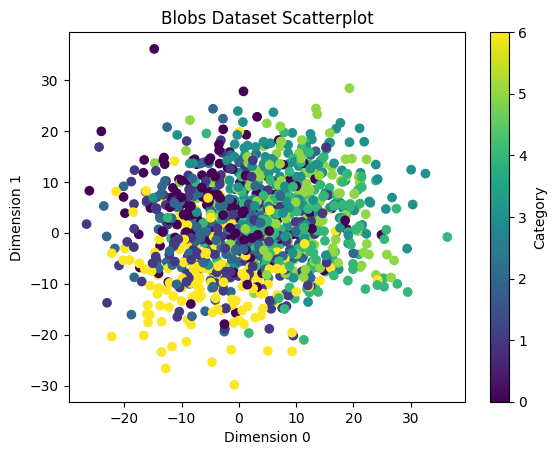

In [50]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

dimension1 = 0
dimension2 = 1

plt.scatter(X[:, dimension1], X[:, dimension2], c=y, cmap='viridis')
plt.xlabel(f"Dimension {dimension1}")
plt.ylabel(f"Dimension {dimension2}")
plt.title("Blobs Dataset Scatterplot")
plt.colorbar(label='Category')
plt.show()

❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

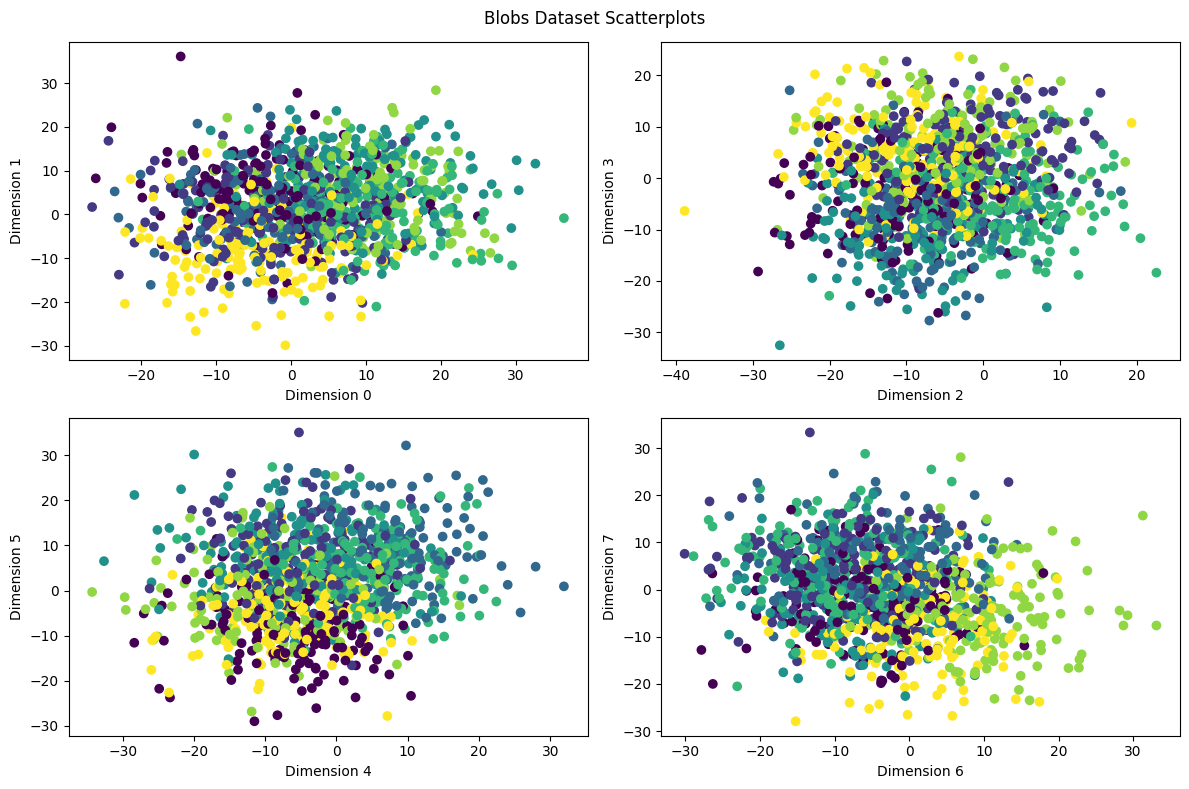

In [51]:
# YOUR CODE HERE
dimensions = [(0, 1), (2, 3), (4, 5), (6, 7)]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle("Blobs Dataset Scatterplots")
for i, ax in enumerate(axes.flatten()):
    dim1, dim2 = dimensions[i]
    ax.scatter(X[:, dim1], X[:, dim2], c=y, cmap='viridis')
    ax.set_xlabel(f"Dimension {dim1}")
    ax.set_ylabel(f"Dimension {dim2}")

fig.tight_layout()
plt.show()

## (2) Encoding the target of a multi-class classification problem

👉 For the moment, the target `y` is a list of integers,  corresponding to the category of the input data. It looks like `[3, 2, 2, 3, 0, 5, 1, 1, 0, 5, ...]` (in this example, we have 7 categories, from 0 to 6).

🧑🏻‍🏫 However, **`for categorical problems in Tensorflow.Keras, the target/output should be encoded`** in the following way:

```
[
[0, 0, 0, 1, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[0, 0, 1, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0], 
[0, 1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 1],
...
]
```

where:
* the number of rows is equal to the number of observations
* the number of columns is equal to the number of different categories

👉 Each column corresponds to a category. 

👉 Each row corresponds to a target, the 1 being the category the input data belongs to.

You can view a row as a vector of probabilities.

```
Example:
| Cat 0 | Cat 1 | Cat 2 | Cat 3 | Cat 4 | Cat 5 | Cat 6 |
|-------|-------|-------|-------|-------|-------|-------|
| 0     | 0     | 0     | 1     | 0     | 0     | 0     |

means that for this given row, there is a 100% chance that the row belongs to the Cat 3
```

--- 

💡 To transform `y` to categories, use **to_categorical** function from Tensorflow/Keras.


<detail>
    <summary><i> Is there an analogy between the _to_categorical_ of Tensorflow/Keras and the _OneHotEncoder_ of Scikit-Learn ?</i></summary>
    

Yes! *to_categorical* works a bit like the OneHotEncoder in Sklearn but instead of encoding a categorical feature, we are now encoding a categorical target.
    
</details>

---

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [52]:
# YOUR CODE HERE
import tensorflow.keras.utils as np_utils

print("Original y:")
print(y)
y_cat = np_utils.to_categorical(y)

print("Categorized y:")
print(y_cat)

Original y:
[2 2 5 ... 1 3 0]
Categorized y:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [53]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=1)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (840, 8)
Shape of y_train: (840, 7)
Shape of X_test: (360, 8)
Shape of y_test: (360, 7)


In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [54]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [55]:
def initialize_model():
    import tensorflow.keras as keras
    
    #############################
    #  1 - Model architecture   #
    ############################# 
    model = keras.models.Sequential()
    
    model.add(keras.layers.Dense(50, activation='relu', input_dim=8))

    num_classes = 7 
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='categorical_crossentropy', # different from binary_crossentropy because we have multiple classes
                  optimizer='adam', 
                  metrics=['accuracy']) 

    return model 

model = initialize_model()


❓  How many parameters (a.k.a. weights) are there in the model ❓

In [56]:
# YOUR CODE HERE
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                450       
                                                                 
 dense_9 (Dense)             (None, 7)                 357       
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

Epoch 1/50
27/27 [==============================] - 1s 24ms/step - loss: 1.8896 - accuracy: 0.2417 - val_loss: 1.8282 - val_accuracy: 0.2556
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 1.6761 - accuracy: 0.3714 - val_loss: 1.6419 - val_accuracy: 0.3972
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 1.5042 - accuracy: 0.4881 - val_loss: 1.4832 - val_accuracy: 0.4778
Epoch 4/50
27/27 [==============================] - 0s 4ms/step - loss: 1.3564 - accuracy: 0.5786 - val_loss: 1.3548 - val_accuracy: 0.5389
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 1.2318 - accuracy: 0.6286 - val_loss: 1.2467 - val_accuracy: 0.6000
Epoch 6/50
27/27 [==============================] - 0s 5ms/step - loss: 1.1288 - accuracy: 0.6464 - val_loss: 1.1561 - val_accuracy: 0.6278
Epoch 7/50
27/27 [==============================] - 0s 7ms/step - loss: 1.0461 - accuracy: 0.6714 - val_loss: 1.0920 - val_accuracy: 0.6472
Epoch 8/50
27/27 [=

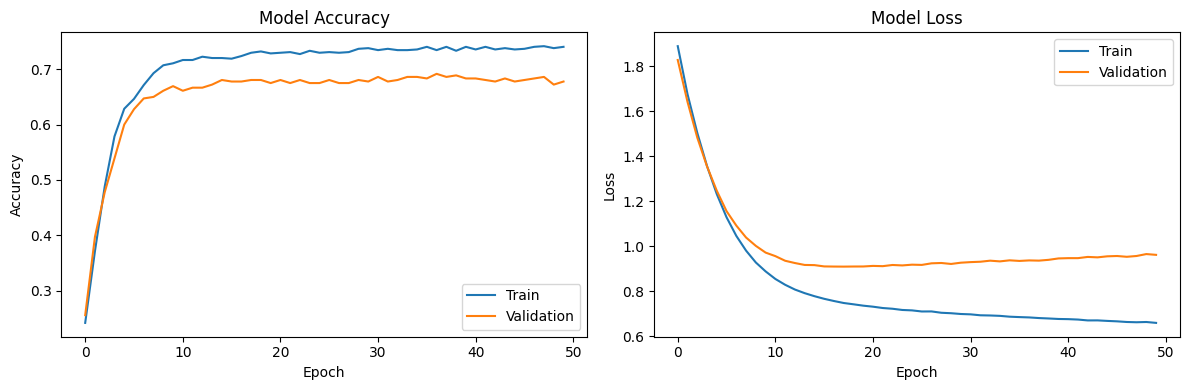

In [57]:
history = model.fit(X_train_scaled, y_train, epochs=50, verbose=1, validation_data=(X_test_scaled, y_test))
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()


❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [58]:
# YOUR CODE HERE
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Accuracy:", accuracy)
print("loss:", loss)

Test Accuracy: 0.6777777671813965
loss: 0.9619365334510803


❓ 🤔 Is this a good score? You should compare it to some sort of benchmark value. In this case, what score would a random guess give? Store this baseline score in the `accuracy_baseline` variable. ❓

In [59]:
import pandas as pd
A = pd.Series(y).value_counts()
accuracy_baseline = 172 / (172 + 172 + 172 + 171 + 171 + 171 + 171)
accuracy_baseline

0.14333333333333334

🧪 **Test your code**

In [60]:
from nbresult import ChallengeResult
result = ChallengeResult('baseline',
                         accuracy=accuracy_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/saikotdasjoy/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/saikotdasjoy/code/Saikot1997/data-multiclass-classification/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_baseline.py::TestBaseline::test_accuracy PASSED                     [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/baseline.pickle

git commit -m 'Completed baseline step'

git push origin master



❗ 👀 Wait ... If you get a closer look at the plot of the loss, it seems that the loss was still decreasing after 50 epochs. Why stop it so soon ❓❗

❓ Let's re-initialize and re-run the model with 1000 epochs this time, and again plot the history. ❓

Epoch 1/1000
27/27 [==============================] - 1s 7ms/step - loss: 1.9724 - accuracy: 0.2298 - val_loss: 1.8170 - val_accuracy: 0.2806
Epoch 2/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.7304 - accuracy: 0.3238 - val_loss: 1.6345 - val_accuracy: 0.3889
Epoch 3/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.5411 - accuracy: 0.4798 - val_loss: 1.4843 - val_accuracy: 0.5139
Epoch 4/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.3872 - accuracy: 0.5774 - val_loss: 1.3611 - val_accuracy: 0.5583
Epoch 5/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.2600 - accuracy: 0.6190 - val_loss: 1.2597 - val_accuracy: 0.5944
Epoch 6/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.1531 - accuracy: 0.6464 - val_loss: 1.1766 - val_accuracy: 0.6222
Epoch 7/1000
27/27 [==============================] - 0s 3ms/step - loss: 1.0667 - accuracy: 0.6690 - val_loss: 1.1105 - val_accuracy: 0.6389
Epoch 

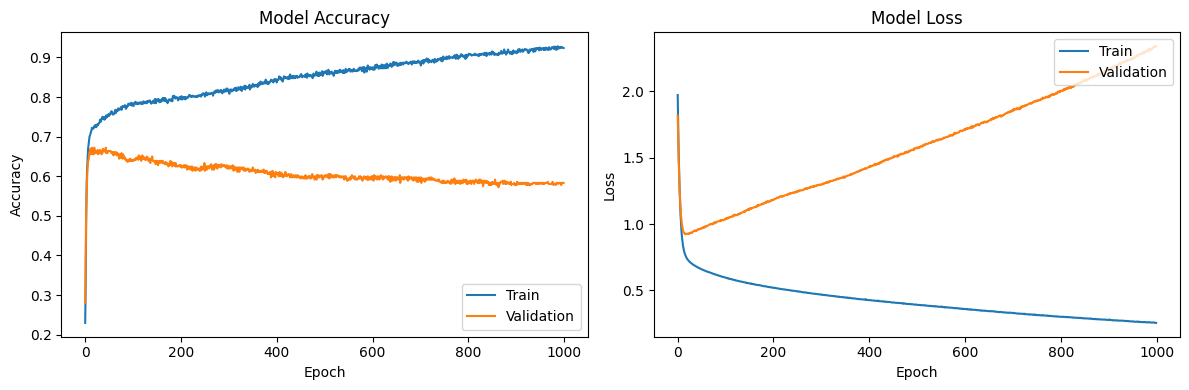

In [61]:
# YOUR CODE HERE
import tensorflow.keras as keras
import matplotlib.pyplot as plt
model = initialize_model()
history = model.fit(X_train_scaled, y_train, epochs=1000, verbose=1, validation_data=(X_test_scaled, y_test))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

❓ **When training a model for a longer time...** ❓ 
- What can you say about the new loss? 
- Once again, evaluate your model on the test set and print the accuracy

In [62]:
# YOUR CODE HERE
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Accuracy:", accuracy)
print("loss:", loss)

Test Accuracy: 0.5833333134651184
loss: 2.3407936096191406


* 😁 The loss computed on the train set seems smaller with 1000 epochs than with 50 epochs. 
* 😟 But the accuracy on the test set is worse with 1000 epochs than with 50 epochs...

❓ What is this phenomenon called ❓

> YOUR ANSWER HERE
The new loss value can help assess whether the model continues to improve or reaches a plateau. If the loss continues to decrease over the additional epochs, it indicates that the model is still learning and refining its predictions. However, if the loss starts to stabilize or fluctuate without significant improvement, it suggests that the model may have reached its optimal performance or even started to overfit the training data.

---

🤔 What should we do to prevent this from happening? 

<details>
    <summary><i>Possible options</i></summary>
    

⚠️ To prevent overfitting from happening in Neural Networks, we can - for example:
1. Choose a ***reasonable number of epochs*** to prevent the neural network from learning too much from noisy data points
2. Create what is called an ***Early Stopping*** criterion, i.e. a way to stop the training earlier than the numbers of epochs set in the _.fit()_ 📆 cf. ***Deep Learning > Optimizers, Loss, Fitting***

</details>    

---


❓ Let's visually check when the test loss starts increasing again in practice.  Run the following command and plot the history❓

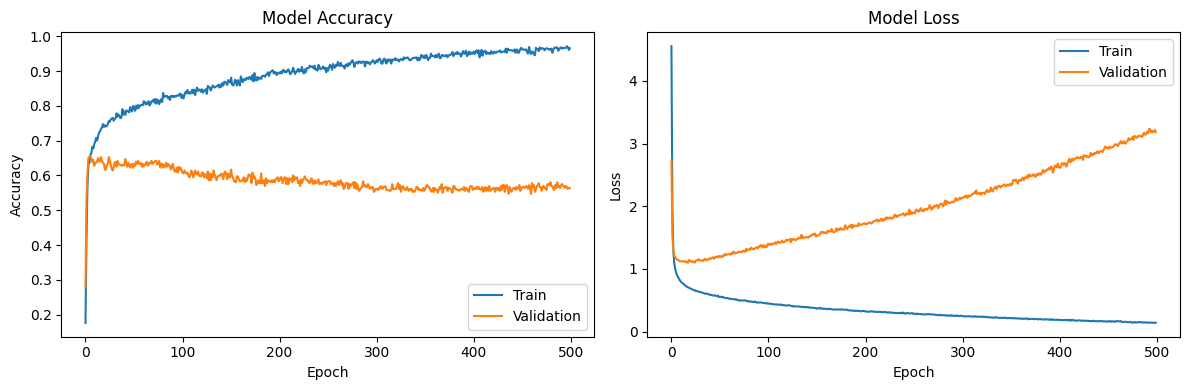

In [65]:
model = initialize_model()

history = model.fit(X_train, 
                    y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 500, 
                    batch_size = 16,
                    verbose = 0)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

😱 But wait... aren't we cheating if we use the test set? Yes we are. But again, be patient. In ***Deep Learning - Optimizers, Loss, Fitting***, we will use what we call a ***Validation Set*** to avoid this!

🧘🏻‍♀️ So for now, let's move on to the next questions!

❓ **Evaluating the network**: Plot the values of the loss and accuracy on the <span style="color:blue">train set</span> and on the <span style="color:orange">test set</span>. What can you comment on that ❓ 

In [66]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

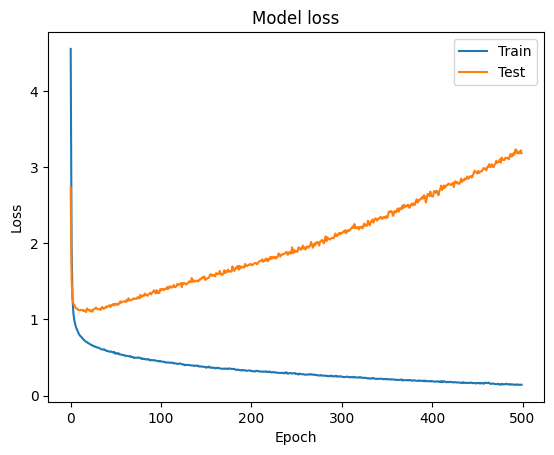

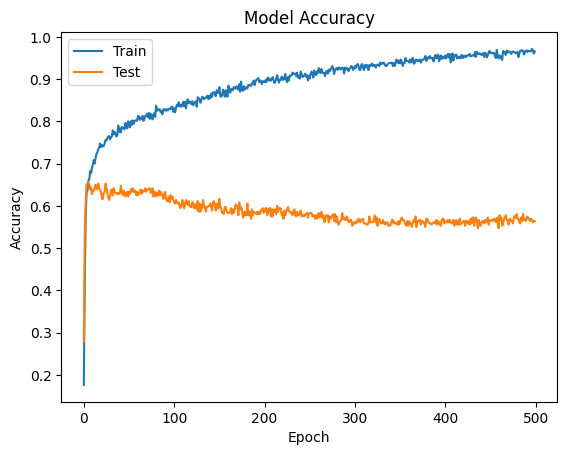

In [67]:
# YOUR CODE HERE
plot_loss_accuracy(history)

🤔 Why is our Deep Learning model overfitting so easily?

😳 Think about it, our neural network has to learn ~800 parameters for a simple classification task from a dataset of only 8 features! Besides, we only have ~800 data points in total to fit! The model could almost "learn" the exact class of every point in its train set. 

By contrast, a simple Logistic Regression would have required to learn only 9 parameters to capture the patterns of this blobs dataset! 

😏 Deep Learning is fancy, but can clearly be an overkill and unnecessary option for easy Machine Learning tasks!

⭐️ It will be extremely useful for:
- 📸 Image Processing
- 💹 Time Series
- 🗣 Natural Language Processing

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!